<a href="https://colab.research.google.com/github/sunyoungmoon012/first-repository/blob/master/Quest_04_%ED%86%B5%EA%B3%84_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from scipy import stats

# 주어진 값들
sample_mean = 495        # 표본 평균
population_mean = 500    # 모집단 평균 (목표 무게)
sample_std = 10          # 표본 표준편차
n = 25                   # 표본 크기
alpha = 0.05             # 유의수준

# t-값 계산
t_statistic = (sample_mean - population_mean) / (sample_std / (n ** 0.5))

# 자유도
df = n - 1

# p-값 계산 (단측 검정, 왼쪽 꼬리)
p_value = stats.t.cdf(t_statistic, df=df)

# 결과 출력
print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서", end=" ")

if p_value < alpha:
    print("귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.")
else:
    print("귀무가설을 채택합니다. 빵의 평균 무게는 목표와 통계적으로 차이가 없습니다.")

t-값: -2.5000, p-value: 0.0098. 유의수준 0.05에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.


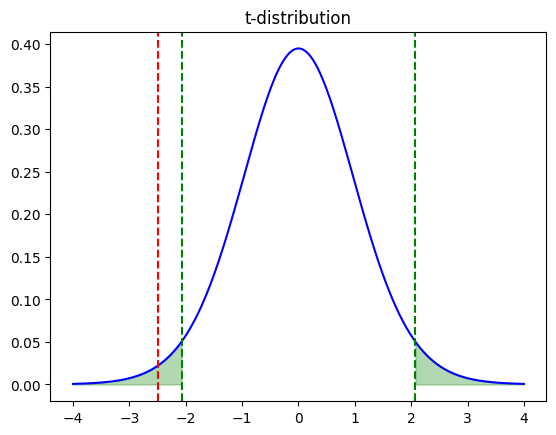

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# 주어진 값
sample_mean = 495
population_mean = 500
sample_std = 10
n = 25
alpha = 0.05

# 계산
t_stat = (sample_mean - population_mean) / (sample_std / (n ** 0.5))
df = n - 1
t_crit = t.ppf(1 - alpha / 2, df)  # 양측 검정일 경우 양쪽 임계값

# x축 범위 설정
x = np.linspace(-4, 4, 400)
y = t.pdf(x, df)

# 그래프 그리기
plt.plot(x, y, color='blue')
plt.title('t-distribution')

# 임계값 (기각역) 영역 색칠
plt.fill_between(x, y, where=(x <= -t_crit), color='green', alpha=0.3)
plt.fill_between(x, y, where=(x >= t_crit), color='green', alpha=0.3)

# 임계값 선 표시 (초록색 점선)
plt.axvline(-t_crit, color='green', linestyle='dashed')
plt.axvline(t_crit, color='green', linestyle='dashed')

# t통계량 선 표시 (빨간색 점선)
plt.axvline(t_stat, color='red', linestyle='dashed')

# 출력
plt.show()

In [11]:
from scipy import stats

# 주어진 표본 점수
sample_scores = [79, 77, 80, 76, 78, 81, 75, 79, 77, 80, 78, 76, 82, 77, 79, 78]

# 단일표본 t-검정
t_stat, p_value_two_tailed = stats.ttest_1samp(sample_scores, popmean=75)

# → 문제는 "향상되었는지?"에 대한 오른쪽 단측 검정
# 따라서 p-value를 1/2로 줄이고 t-값이 양수일 경우만 판단
alpha = 0.05
if t_stat > 0:
    p_value = p_value_two_tailed / 2
else:
    p_value = 1  # 오른쪽 검정인데 t_stat이 음수면 귀무가설 채택

# 결과 출력
print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서", end=" ")

if p_value < alpha:
    print("귀무가설을 기각합니다. 교육 프로그램은 효과가 있습니다.")
else:
    print("귀무가설을 채택합니다. 교육 프로그램의 효과는 통계적으로 확인되지 않았습니다.")

t-값: 6.7890, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 교육 프로그램은 효과가 있습니다.


In [12]:
from scipy import stats

# 각 그룹 데이터
group_A = [5.1, 4.7, 6.2, 4.9, 5.3, 6.1, 5.0, 5.8, 4.8, 5.2]
group_B = [4.3, 4.1, 3.8, 4.6, 4.0, 4.5, 3.7, 4.2, 3.9, 4.4, 3.5, 4.3]

# 등분산 검정
stat_levene, p_levene = stats.levene(group_A, group_B)

# 등분산 여부 판단
equal_var = p_levene > 0.05

# 독립표본 t-검정
t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=equal_var)

# 유의수준
alpha = 0.05

# 결과 출력
print(f"[등분산 검정] p-value: {p_levene:.4f} → equal_var = {equal_var}")
print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서", end=" ")

if p_value < alpha:
    print("귀무가설을 기각합니다. 다이어트 프로그램은 효과 차이가 있습니다.")
else:
    print("귀무가설을 채택합니다. 두 프로그램 간 효과 차이는 통계적으로 유의하지 않습니다.")

[등분산 검정] p-value: 0.2703 → equal_var = True
t-값: 6.3898, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과 차이가 있습니다.
